In [2]:
import pandas as pd

# Charger les données
df = pd.read_csv("C:/Users/pc/MachingLearning/datasets/CC GENERAL.csv")

# Afficher les 5 premières lignes
print(df.head())

# Afficher les informations du DataFrame
print(df.info())

# Afficher le nombre de valeurs manquantes pour chaque colonne
print(df.isna().sum())


  CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000       

In [3]:
# Afficher le résumé statistique du DataFrame
print(df.describe())


            BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000

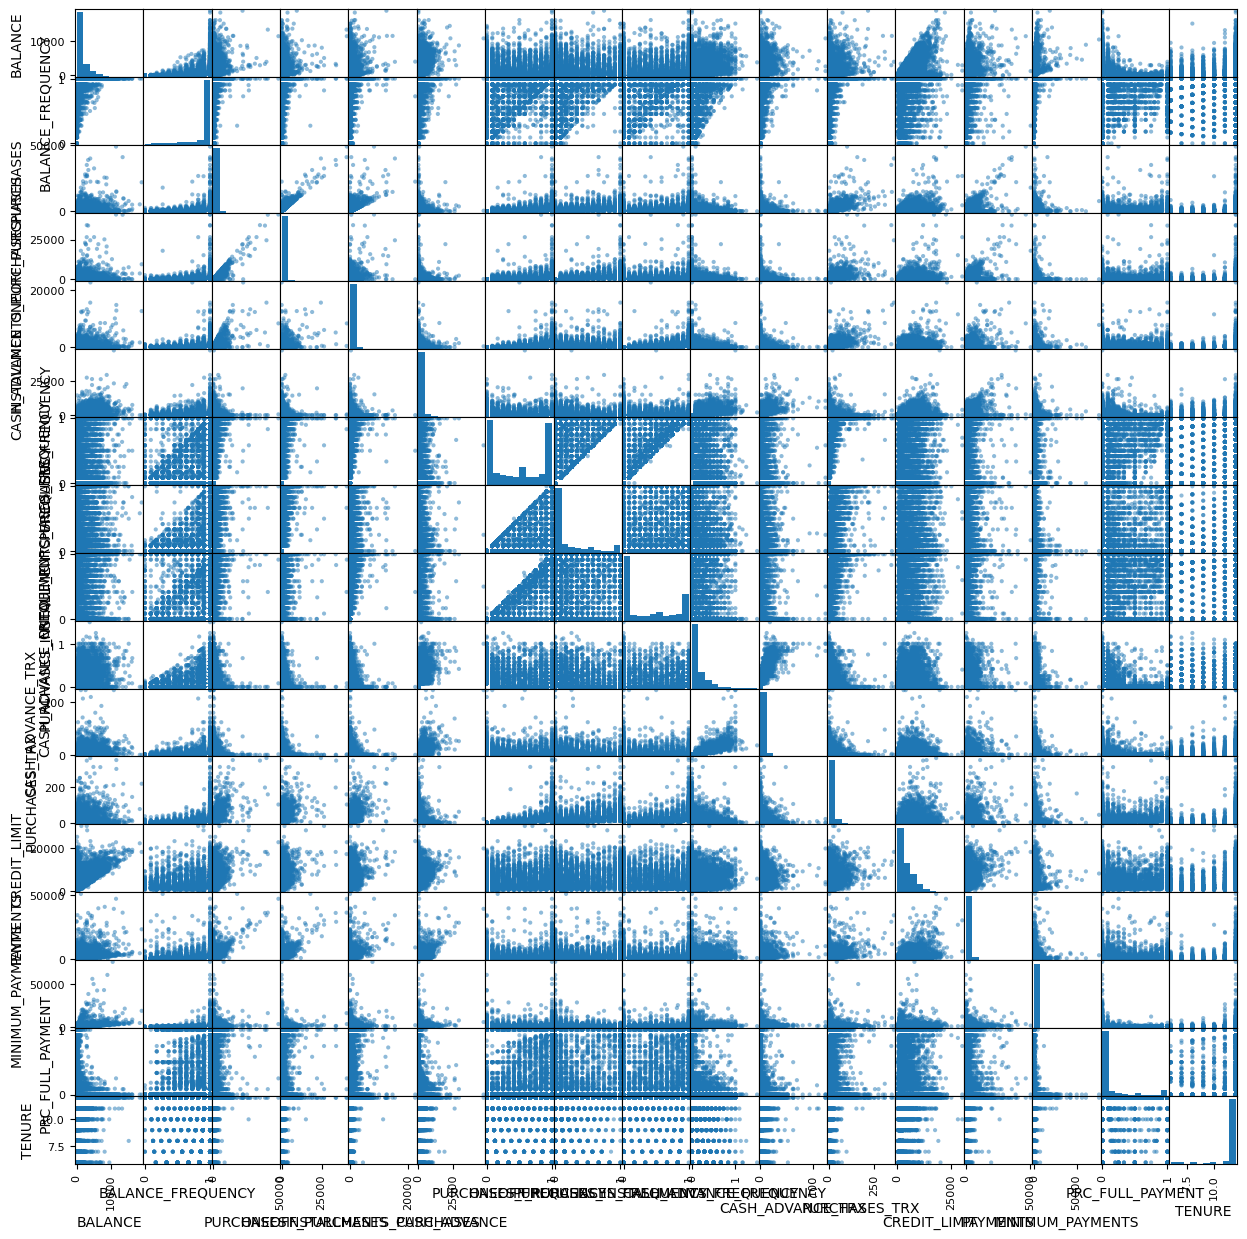

In [4]:
import matplotlib.pyplot as plt

# Afficher la matrice de dispersion
pd.plotting.scatter_matrix(df.loc[:, "BALANCE":"TENURE"], figsize=(15, 15), diagonal="hist")

# Afficher le graphique
plt.show()


In [5]:
from sklearn.cluster import KMeans

# Créer le modèle KMeans avec 5 clusters
kmeans_model = KMeans(n_clusters=5, random_state=42)

# Entraîner le modèle sur les données
kmeans_model.fit(df.loc[:, "BALANCE":"PURCHASES"])

# Obtenir les étiquettes de cluster pour chaque échantillon
labels = kmeans_model.labels_


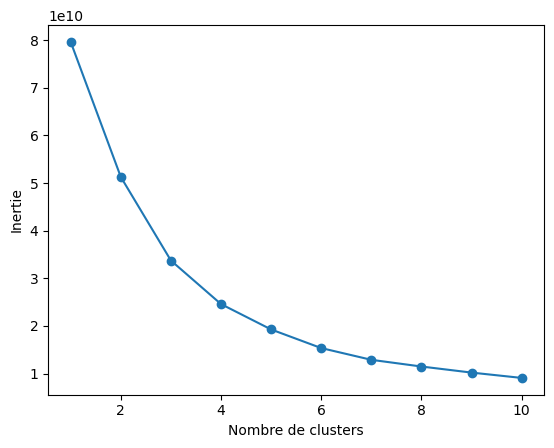

In [6]:
# Créer une liste pour stocker les valeurs d'inertie
inertia = []

# Tester différents nombres de clusters de 1 à 10
for k in range(1, 11):
    # Créer un modèle KMeans avec k clusters
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(df.loc[:, "BALANCE":"PURCHASES"])
    # Ajouter l'inertie du modèle à la liste
    inertia.append(model.inertia_)

# Tracer le graphique de la méthode du coude
import matplotlib.pyplot as plt

plt.plot(range(1, 11), inertia, marker="o")
plt.xlabel("Nombre de clusters")
plt.ylabel("Inertie")
plt.show()


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


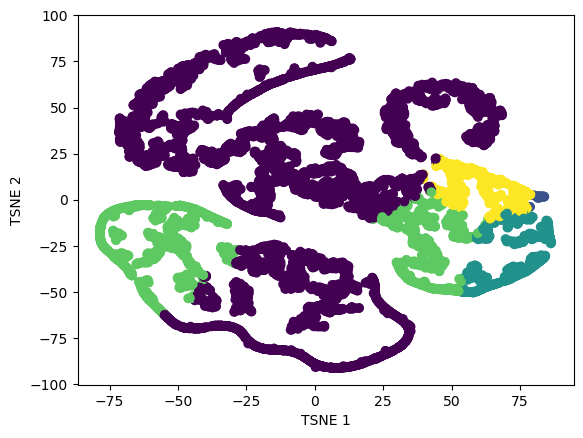

In [7]:
from sklearn.manifold import TSNE

# Réduire les dimensions des données à 2 avec t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(df.loc[:, "BALANCE":"PURCHASES"])

# Tracer le graphique des clusters
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels, cmap="viridis")
plt.xlabel("TSNE 1")
plt.ylabel("TSNE 2")
plt.show()


In [8]:
# Ajouter les étiquettes de cluster au DataFrame
df["cluster"] = labels

# Afficher les moyennes des variables pour chaque cluster
print(df.groupby("cluster").mean())


             BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
cluster                                                                   
0         531.400930           0.827250    605.168032        306.003752   
1        5390.389571           0.946591  27690.865833      21422.884583   
2        7337.439619           0.993624   1140.272681        659.698465   
3        2989.748672           0.981807    587.208112        342.809521   
4        2089.912110           0.976796   5826.916163       3849.769702   

         INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
cluster                                                              
0                    299.461910    426.362536             0.493854   
1                   6267.981250    929.689201             0.888194   
2                    480.687116   4071.886087             0.427730   
3                    244.490993   1928.830754             0.371069   
4                   1978.436720    699.224694         

In [1]:
import pandas as pd

# Charger le jeu de données
df = pd.read_csv('C:/Users/pc/MachingLearning/datasets/CC GENERAL.csv')

# Remplacer les valeurs manquantes par la moyenne de la colonne
df.fillna(df.mean(), inplace=True)

# Vérifier s'il y a toujours des valeurs manquantes
print(df.isnull().sum())


CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64


C:\Users\pc\AppData\Local\Temp\ipykernel_2276\1825222321.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean(), inplace=True)


[[ 1.16911324  0.34490892 -0.28778581 -0.20688683 -0.30044877  1.3747282
  -0.63649948 -0.30533112 -0.54752856  1.55168924  1.33382702 -0.36127522
   0.60576613  0.44302355  0.39990619 -0.41235776]
 [ 0.31257665  0.43777864  1.54017614  1.29094831  1.26960748 -0.24933907
   1.14381822  1.56657826  0.96026431 -0.36099515 -0.25147719  1.69139689
   0.88868786  0.84201191  0.1556052   0.49978545]
 [-0.36855828 -0.1778099  -0.23254204 -0.20390024 -0.17513967 -0.31006015
  -0.06201614 -0.23322652 -0.04861591 -0.33406823 -0.29892481 -0.24353187
  -0.33623992 -0.28430334 -0.13580114  0.00804705]]
[2 0 2 ... 2 2 2]


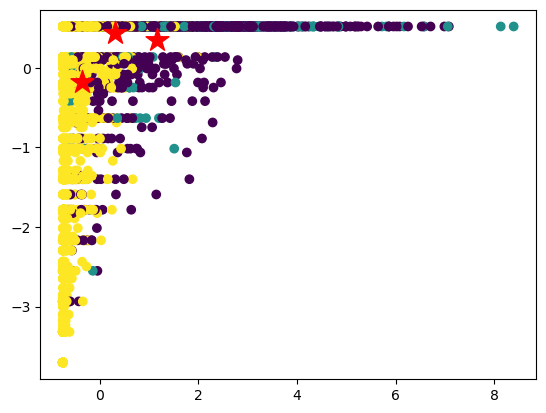

[[-0.03473299  0.02574942  0.14735473  0.09425478  0.17520159 -0.06743599
   0.41819314  0.19038944  0.3715515  -0.13999131 -0.07696001  0.21508957
   0.0956257   0.05931197  0.00422617  0.16297712]
 [ 0.0159859   0.04945351 -0.26020095 -0.17770815 -0.28872525  0.05670878
  -0.6917529  -0.33232228 -0.58870887  0.19676892  0.07827292 -0.35803334
  -0.22366787 -0.14373479 -0.04308992 -0.2864243 ]
 [-0.03517599  0.02852695  0.15014236  0.09590547  0.17875735 -0.06879332
   0.42460397  0.1936856   0.37806906 -0.14192417 -0.07828049  0.21939587
   0.09657567  0.06020134  0.00409299  0.16519489]]
[1 1 2 ... 0 1 0]


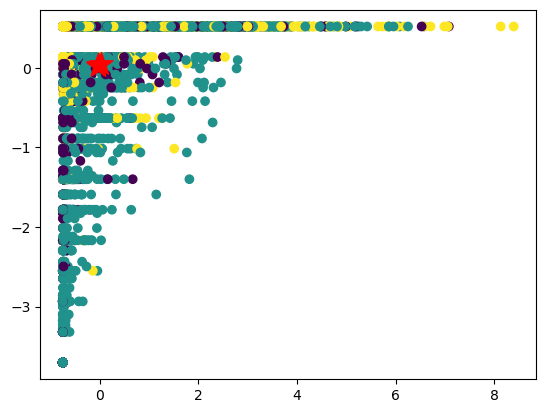

In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import skfuzzy as fuzz
import matplotlib.pyplot as plt


# remove the irrelevant columns
X = df.iloc[:, 1:-1].values

# normalize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

# K-means
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

# cluster centers
print(kmeans.cluster_centers_)

# cluster labels
print(kmeans.labels_)

# plot clusters
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='*', s=300, c='r')
plt.show()

# Fuzzy C-means
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(X.T, 3, 2, error=0.005, maxiter=1000, init=None)

# cluster centers
print(cntr)

# cluster labels
labels = np.argmax(u, axis=0)
print(labels)

# plot clusters
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.scatter(cntr[:, 0], cntr[:, 1], marker='*', s=300, c='r')
plt.show()


In [11]:
!pip install scikit-fuzzy


Defaulting to user installation because normal site-packages is not writeable
     ------------------------------------ 994.0/994.0 kB 344.0 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894075 sha256=161a2ba604d0aa0de36d032576238b299c0d47f4760338845b03c708d795a547
  Stored in directory: c:\users\pc\appdata\local\pip\cache\wheels\32\2c\a1\a90a7d7dd8448ec029f298a61f3490275e99b17aa348be675c
Successfully built scikit-fuzzy


In [8]:
import skfuzzy as fuzz

# Créer le modèle FCM avec 5 clusters et un degré de flou de 2
fcm_model = fuzz.cluster.cmeans(data=df.loc[:, "BALANCE":"PURCHASES"].T, c=5, m=2, error=0.005, maxiter=1000)

# Obtenir les étiquettes de cluster pour chaque échantillon
fcm_labels = fcm_model[1].argmax(axis=0)


[-1 -1 -1 ... -1 -1 -1]


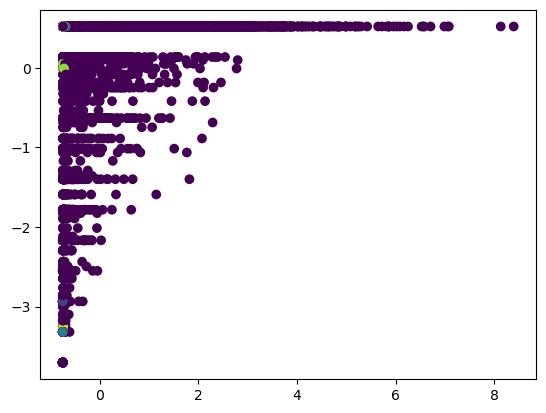

In [9]:
# DBSCAN
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.3, min_samples=5)
dbscan.fit(X)

# cluster labels
print(dbscan.labels_)

# plot clusters
plt.scatter(X[:, 0], X[:, 1], c=dbscan.labels_, cmap='viridis')
plt.show()


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


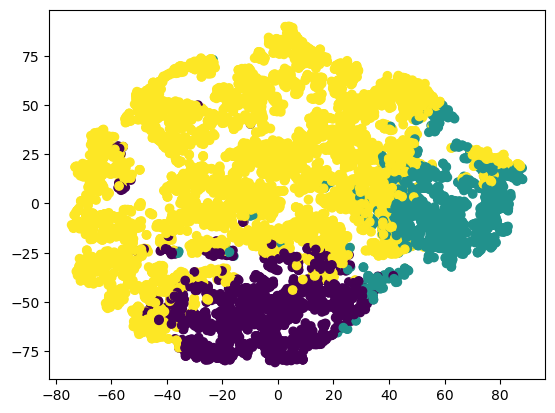

In [10]:
# t-SNE
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, n_iter=1000, random_state=42)
X_tsne = tsne.fit_transform(X)

# plot clusters
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=kmeans.labels_, cmap='viridis')
plt.show()


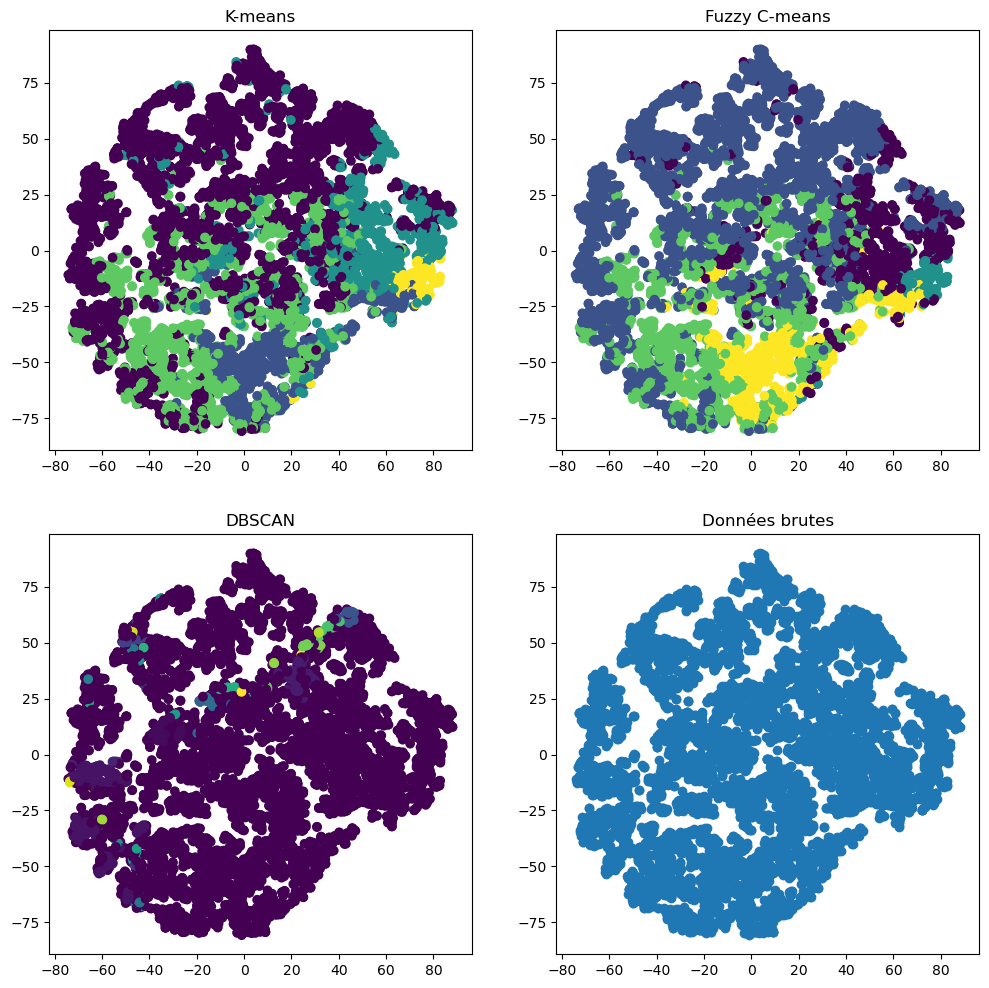

In [12]:
# Afficher les graphiques de chaque modèle
fig, axs = plt.subplots(2, 2, figsize=(12, 12))
axs[0, 0].scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels, cmap="viridis")
axs[0, 0].set_title("K-means")
axs[0, 1].scatter(X_tsne[:, 0], X_tsne[:, 1], c=fcm_labels, cmap="viridis")
axs[0, 1].set_title("Fuzzy C-means")
axs[1, 0].scatter(X_tsne[:, 0], X_tsne[:, 1], c=dbscan.labels_, cmap="viridis")
axs[1, 0].set_title("DBSCAN")
axs[1, 1].scatter(X_tsne[:, 0], X_tsne[:, 1])
axs[1, 1].set_title("Données brutes")
plt.show()